In [50]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
print(cv2.__version__)

4.8.1


In [42]:
figsize = (32, 32)

def plot_images_bgr(imgs):
    plt.figure(figsize=figsize)
    for i, img in enumerate(imgs):
        plt.subplot(1, 6, i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR), cmap='gray')
    plt.tight_layout()
    plt.show()

def plot_images_gray(imgs):
    plt.figure(figsize=figsize)
    for i, img in enumerate(imgs):
        plt.subplot(1, 6, i+1)
        plt.imshow(img, cmap='gray')
    plt.tight_layout()
    plt.show()

# Questao 1

Na documentacao da OpenCV  ́e possıvel encontrar diversos detectores e descritores. Usando um conjunto com pelo menos 6 imagens (voce pode tirar fotos com seu telefone, por exemplo), experimente tres detectores distintos nestas imagens, incluindo o detector de Harris.

Pesquise e descreva resumidamente com suas palavras (ate 200 palavras para cada) como cada um funciona, incluindo seus parametros e quais suas principais diferen ̧cas. Exiba resultados nas suas imagens, e em quais situacoes cada um funciona bem ou mal. Discuta seus parametros. Qual deles voce achou melhor? Justifique.

In [28]:
imgs = []
gray_imgs = []
for i in range(1, 7):
    img = cv2.imread(f'./Questao1/{i}.jpg', cv2.IMREAD_COLOR)
    imgs.append(img)
    gray_imgs.append(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

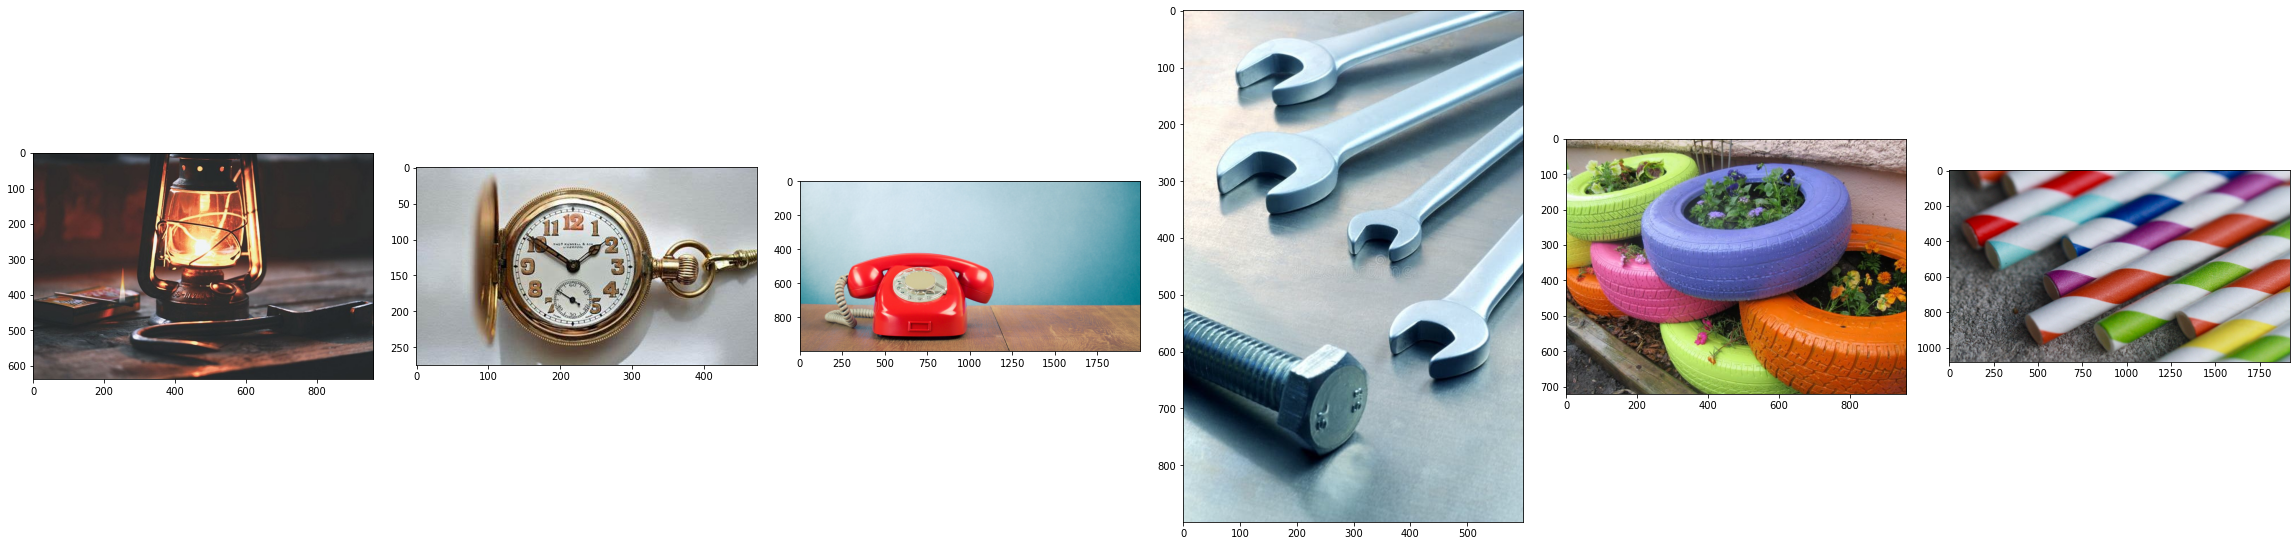

In [43]:
plot_images_bgr(imgs)

## Detector de Harris

In [55]:
harris_imgs = []
for i, gray_img in enumerate(gray_imgs):
    dst = cv2.cornerHarris(gray_img, 2, 3, 0.04)
    img = np.copy(imgs[i])
    img[dst > 0.01 * dst.max()] = [0, 0, 255]
    harris_imgs.append(img)

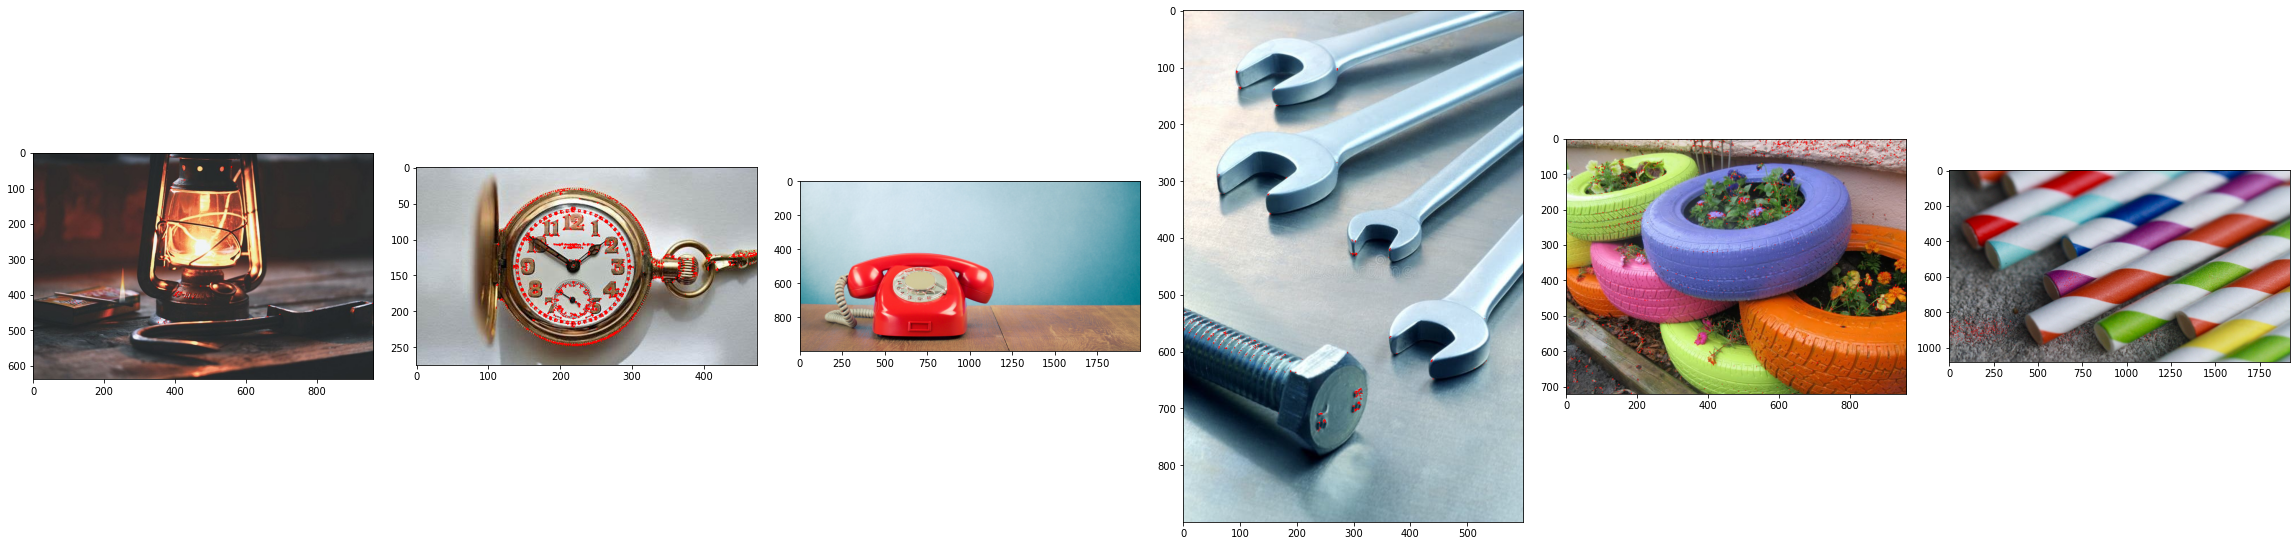

In [56]:
plot_images_bgr(harris_imgs)

## SIFT

In [37]:
sift = cv2.SIFT_create()

sift_imgs = []
for gray_img in gray_imgs:
    kp, des = sift.detectAndCompute(gray_img, None)
    sift_imgs.append(cv2.drawKeypoints(gray_img, kp, None))

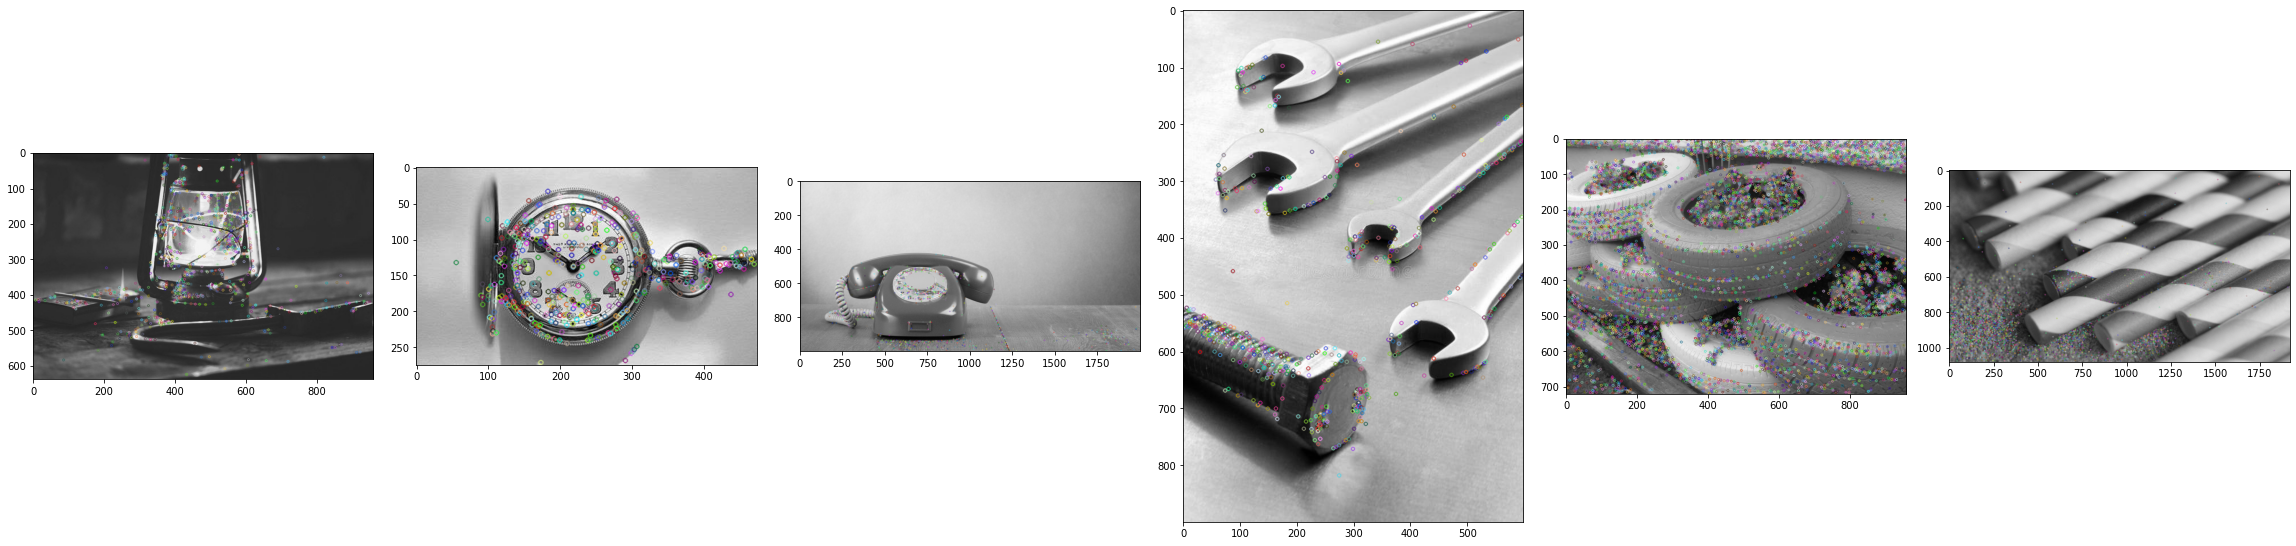

In [44]:
plot_images_gray(sift_imgs)

## ORB

In [48]:
orb = cv2.ORB_create()

orb_imgs = []
for gray_img in gray_imgs:
    kp, des = orb.detectAndCompute(gray_img, None)
    orb_imgs.append(cv2.drawKeypoints(gray_img, kp, None))

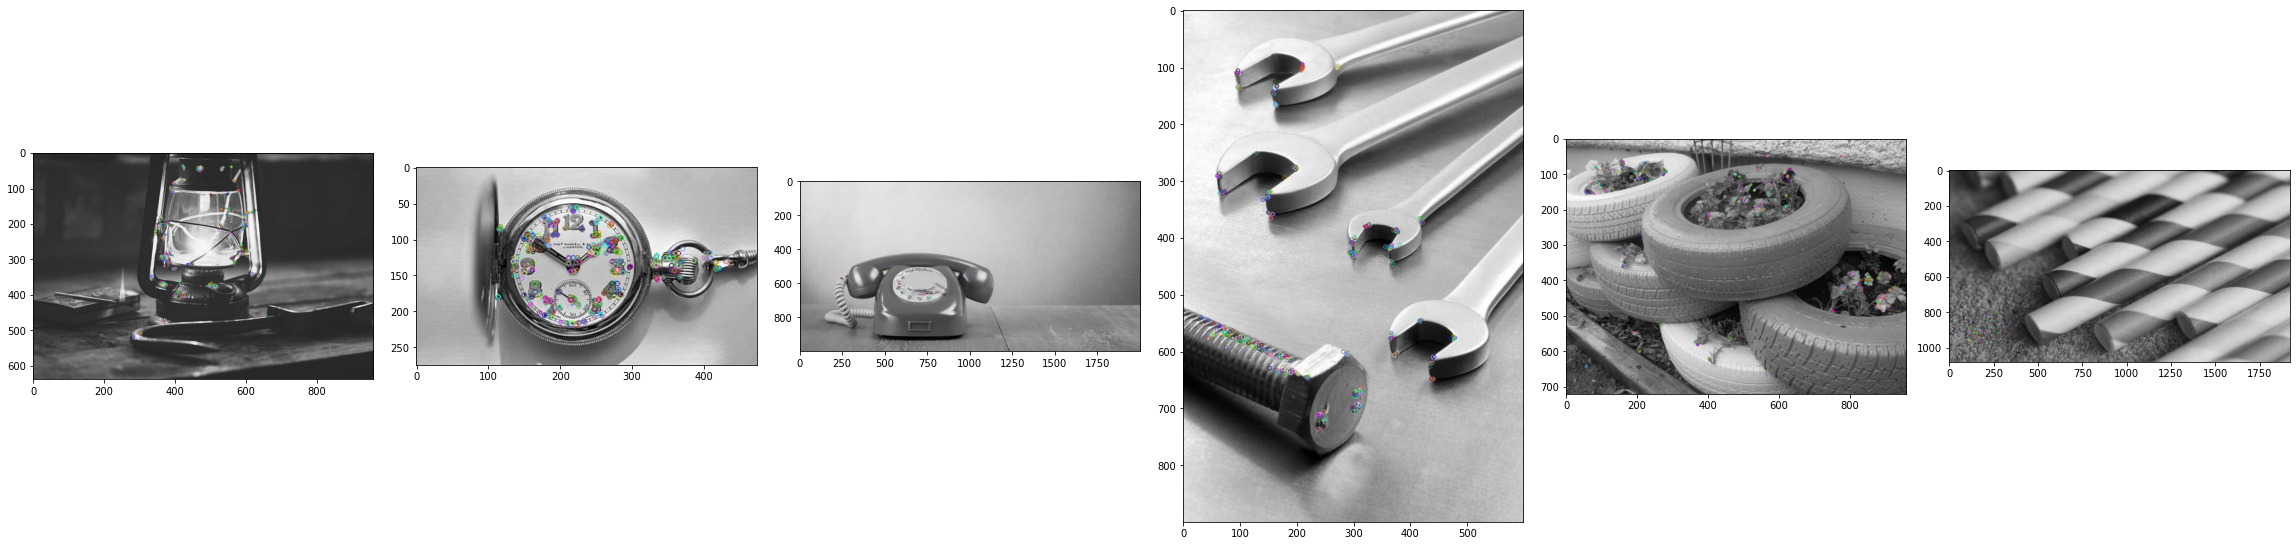

In [49]:
plot_images_gray(orb_imgs)